In [2]:
import pandas as pd

In [3]:
adv_model = pd.read_excel('Advertising.xlsx')

In [4]:
adv_model.head()

,TV,Radio,Newspaper,Area,Prod_type,Sales
0,230.1,37.8,69.2,suburban,Basic,38.0
1,44.5,39.3,45.1,rural,Higher,10.4
2,17.2,45.9,69.3,rural,Medium,9.3
3,151.5,41.3,58.5,suburban,Medium,18.5
4,180.8,10.8,58.4,suburban,Higher,12.9


In [5]:
adv_model.Radio=adv_model.Radio.fillna(adv_model.Radio.mean())
adv_model.Newspaper=adv_model.Radio.fillna(adv_model.Newspaper.mean())
adv_model.head()

,TV,Radio,Newspaper,Area,Prod_type,Sales
0,230.1,37.8,37.8,suburban,Basic,38.0
1,44.5,39.3,39.3,rural,Higher,10.4
2,17.2,45.9,45.9,rural,Medium,9.3
3,151.5,41.3,41.3,suburban,Medium,18.5
4,180.8,10.8,10.8,suburban,Higher,12.9


In [6]:
adv_model.isnull().sum()

TV           0
Radio        0
Newspaper    0
Area         0
Prod_type    0
Sales        0
dtype: int64

In [7]:
adv_model.Radio.mean()

23.46262626262629

In [8]:
input_data=pd.get_dummies(adv_model,columns=['Area','Prod_type'])

In [9]:
input_data.head()

,TV,Radio,Newspaper,Sales,Area_rural,Area_suburban,Area_urban,Prod_type_Basic,Prod_type_Higher,Prod_type_Medium
0,230.1,37.8,37.8,38.0,0,1,0,1,0,0
1,44.5,39.3,39.3,10.4,1,0,0,0,1,0
2,17.2,45.9,45.9,9.3,1,0,0,0,0,1
3,151.5,41.3,41.3,18.5,0,1,0,0,0,1
4,180.8,10.8,10.8,12.9,0,1,0,0,1,0


In [10]:
x=input_data.drop('Sales', axis =1)

In [11]:
y=input_data['Sales']

In [12]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [13]:
x_train,x_test, y_train,y_test= train_test_split(x,y,test_size=.4)
rtree=tree.DecisionTreeRegressor()
rtree.fit(x_train, y_train) 
y_test_pred =rtree.predict(x_test)

In [14]:
comp_df=x_test.copy()
comp_df['pred']=y_test_pred
comp_df['actual']=y_test
comp_df.head()  #pred  actual---find

,TV,Radio,Newspaper,Area_rural,Area_suburban,Area_urban,Prod_type_Basic,Prod_type_Higher,Prod_type_Medium,pred,actual
91,28.6,1.5,1.5,0,0,1,1,0,0,6.9,7.3
109,255.4,26.9,26.9,1,0,0,0,0,1,18.9,19.8
95,163.3,31.6,31.6,0,1,0,0,1,0,18.3,16.9
88,88.3,25.5,25.5,1,0,0,0,0,1,11.8,12.9
14,204.1,32.9,32.9,1,0,0,0,0,1,20.1,19.0


In [15]:
import numpy as np
from sklearn import metrics
np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

4.682453950654508

In [29]:
y_null = np.zeros_like(y_test, dtype = float)
y_null.fill(y_test.mean())
y_null

array([15.74, 15.74, 15.74, 15.74, 15.74, 15.74, 15.74, 15.74, 15.74,
       15.74, 15.74, 15.74, 15.74, 15.74, 15.74, 15.74, 15.74, 15.74,
       15.74, 15.74, 15.74, 15.74, 15.74, 15.74, 15.74, 15.74, 15.74,
       15.74, 15.74, 15.74, 15.74, 15.74, 15.74, 15.74, 15.74, 15.74,
       15.74, 15.74, 15.74, 15.74, 15.74, 15.74, 15.74, 15.74, 15.74,
       15.74, 15.74, 15.74, 15.74, 15.74, 15.74, 15.74, 15.74, 15.74,
       15.74, 15.74, 15.74, 15.74, 15.74, 15.74, 15.74, 15.74, 15.74,
       15.74, 15.74, 15.74, 15.74, 15.74, 15.74, 15.74, 15.74, 15.74,
       15.74, 15.74, 15.74, 15.74, 15.74, 15.74, 15.74, 15.74])

In [30]:
np.sqrt(metrics.mean_squared_error(y_test, y_null))

8.516507500143472

In [31]:
x_train.shape

(120, 9)

In [32]:
rtree.feature_importances_

array([6.48977854e-01, 5.75035588e-02, 9.36657205e-02, 2.52109689e-04,
       1.67268683e-04, 1.58114676e-05, 1.99134289e-01, 5.80447296e-05,
       2.25343133e-04])

In [33]:
comp_df=pd.DataFrame()
comp_df['Advertisements']=x.columns
comp_df['Sales']=rtree.feature_importances_*100
comp_df

,Advertisements,Sales
0,TV,64.897785
1,Radio,5.750356
2,Newspaper,9.366572
3,Area_rural,0.025211
4,Area_suburban,0.016727
5,Area_urban,0.001581
6,Prod_type_Basic,19.913429
7,Prod_type_Higher,0.005804
8,Prod_type_Medium,0.022534


In [34]:
from sklearn.model_selection import GridSearchCV

In [35]:
param_grid = { "criterion"      : ['mse', 'mae'],    
               "max_features"   : [3, 4, 5 ],             
               "splitter"       : ['best', 'random'],  
               "min_samples_leaf" : [2, 3, 4],
               "max_depth"        : [5, 6, 7]
                }

In [36]:
optimized_tree=GridSearchCV(rtree, param_grid, scoring= 'neg_mean_absolute_error', verbose=2, cv=5)

In [37]:
optimized_tree.fit(x_train,y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] criterion=mse, max_depth=5, max_features=3, min_samples_leaf=2, splitter=best 
[CV]  criterion=mse, max_depth=5, max_features=3, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] criterion=mse, max_depth=5, max_features=3, min_samples_leaf=2, splitter=best 
[CV]  criterion=mse, max_depth=5, max_features=3, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] criterion=mse, max_depth=5, max_features=3, min_samples_leaf=2, splitter=best 
[CV]  criterion=mse, max_depth=5, max_features=3, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] criterion=mse, max_depth=5, max_features=3, min_samples_leaf=2, splitter=best 
[CV]  criterion=mse, max_depth=5, max_features=3, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] criterion=mse, max_depth=5, max_features=3, min_samples_leaf=2, splitter=best 
[CV]  criterion=mse, max_depth=5, max_features=3, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] criterion=mse, ma

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  criterion=mse, max_depth=5, max_features=3, min_samples_leaf=3, splitter=best, total=   0.0s
[CV] criterion=mse, max_depth=5, max_features=3, min_samples_leaf=3, splitter=best 
[CV]  criterion=mse, max_depth=5, max_features=3, min_samples_leaf=3, splitter=best, total=   0.0s
[CV] criterion=mse, max_depth=5, max_features=3, min_samples_leaf=3, splitter=best 
[CV]  criterion=mse, max_depth=5, max_features=3, min_samples_leaf=3, splitter=best, total=   0.0s
[CV] criterion=mse, max_depth=5, max_features=3, min_samples_leaf=3, splitter=best 
[CV]  criterion=mse, max_depth=5, max_features=3, min_samples_leaf=3, splitter=best, total=   0.0s
[CV] criterion=mse, max_depth=5, max_features=3, min_samples_leaf=3, splitter=best 
[CV]  criterion=mse, max_depth=5, max_features=3, min_samples_leaf=3, splitter=best, total=   0.0s
[CV] criterion=mse, max_depth=5, max_features=3, min_samples_leaf=3, splitter=random 
[CV]  criterion=mse, max_depth=5, max_features=3, min_samples_leaf=3, splitter=rand

[CV]  criterion=mse, max_depth=5, max_features=5, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] criterion=mse, max_depth=5, max_features=5, min_samples_leaf=2, splitter=best 
[CV]  criterion=mse, max_depth=5, max_features=5, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] criterion=mse, max_depth=5, max_features=5, min_samples_leaf=2, splitter=best 
[CV]  criterion=mse, max_depth=5, max_features=5, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] criterion=mse, max_depth=5, max_features=5, min_samples_leaf=2, splitter=random 
[CV]  criterion=mse, max_depth=5, max_features=5, min_samples_leaf=2, splitter=random, total=   0.0s
[CV] criterion=mse, max_depth=5, max_features=5, min_samples_leaf=2, splitter=random 
[CV]  criterion=mse, max_depth=5, max_features=5, min_samples_leaf=2, splitter=random, total=   0.0s
[CV] criterion=mse, max_depth=5, max_features=5, min_samples_leaf=2, splitter=random 
[CV]  criterion=mse, max_depth=5, max_features=5, min_samples_leaf=2, split

[CV] criterion=mse, max_depth=6, max_features=3, min_samples_leaf=4, splitter=random 
[CV]  criterion=mse, max_depth=6, max_features=3, min_samples_leaf=4, splitter=random, total=   0.0s
[CV] criterion=mse, max_depth=6, max_features=3, min_samples_leaf=4, splitter=random 
[CV]  criterion=mse, max_depth=6, max_features=3, min_samples_leaf=4, splitter=random, total=   0.0s
[CV] criterion=mse, max_depth=6, max_features=4, min_samples_leaf=2, splitter=best 
[CV]  criterion=mse, max_depth=6, max_features=4, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] criterion=mse, max_depth=6, max_features=4, min_samples_leaf=2, splitter=best 
[CV]  criterion=mse, max_depth=6, max_features=4, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] criterion=mse, max_depth=6, max_features=4, min_samples_leaf=2, splitter=best 
[CV]  criterion=mse, max_depth=6, max_features=4, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] criterion=mse, max_depth=6, max_features=4, min_samples_leaf=2, splitter

[CV]  criterion=mse, max_depth=6, max_features=5, min_samples_leaf=3, splitter=random, total=   0.0s
[CV] criterion=mse, max_depth=6, max_features=5, min_samples_leaf=3, splitter=random 
[CV]  criterion=mse, max_depth=6, max_features=5, min_samples_leaf=3, splitter=random, total=   0.0s
[CV] criterion=mse, max_depth=6, max_features=5, min_samples_leaf=3, splitter=random 
[CV]  criterion=mse, max_depth=6, max_features=5, min_samples_leaf=3, splitter=random, total=   0.0s
[CV] criterion=mse, max_depth=6, max_features=5, min_samples_leaf=3, splitter=random 
[CV]  criterion=mse, max_depth=6, max_features=5, min_samples_leaf=3, splitter=random, total=   0.0s
[CV] criterion=mse, max_depth=6, max_features=5, min_samples_leaf=4, splitter=best 
[CV]  criterion=mse, max_depth=6, max_features=5, min_samples_leaf=4, splitter=best, total=   0.0s
[CV] criterion=mse, max_depth=6, max_features=5, min_samples_leaf=4, splitter=best 
[CV]  criterion=mse, max_depth=6, max_features=5, min_samples_leaf=4, s

[CV]  criterion=mse, max_depth=7, max_features=4, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] criterion=mse, max_depth=7, max_features=4, min_samples_leaf=2, splitter=random 
[CV]  criterion=mse, max_depth=7, max_features=4, min_samples_leaf=2, splitter=random, total=   0.0s
[CV] criterion=mse, max_depth=7, max_features=4, min_samples_leaf=2, splitter=random 
[CV]  criterion=mse, max_depth=7, max_features=4, min_samples_leaf=2, splitter=random, total=   0.0s
[CV] criterion=mse, max_depth=7, max_features=4, min_samples_leaf=2, splitter=random 
[CV]  criterion=mse, max_depth=7, max_features=4, min_samples_leaf=2, splitter=random, total=   0.0s
[CV] criterion=mse, max_depth=7, max_features=4, min_samples_leaf=2, splitter=random 
[CV]  criterion=mse, max_depth=7, max_features=4, min_samples_leaf=2, splitter=random, total=   0.0s
[CV] criterion=mse, max_depth=7, max_features=4, min_samples_leaf=2, splitter=random 
[CV]  criterion=mse, max_depth=7, max_features=4, min_samples_leaf=

[CV]  criterion=mse, max_depth=7, max_features=5, min_samples_leaf=4, splitter=best, total=   0.0s
[CV] criterion=mse, max_depth=7, max_features=5, min_samples_leaf=4, splitter=random 
[CV]  criterion=mse, max_depth=7, max_features=5, min_samples_leaf=4, splitter=random, total=   0.0s
[CV] criterion=mse, max_depth=7, max_features=5, min_samples_leaf=4, splitter=random 
[CV]  criterion=mse, max_depth=7, max_features=5, min_samples_leaf=4, splitter=random, total=   0.0s
[CV] criterion=mse, max_depth=7, max_features=5, min_samples_leaf=4, splitter=random 
[CV]  criterion=mse, max_depth=7, max_features=5, min_samples_leaf=4, splitter=random, total=   0.0s
[CV] criterion=mse, max_depth=7, max_features=5, min_samples_leaf=4, splitter=random 
[CV]  criterion=mse, max_depth=7, max_features=5, min_samples_leaf=4, splitter=random, total=   0.0s
[CV] criterion=mse, max_depth=7, max_features=5, min_samples_leaf=4, splitter=random 
[CV]  criterion=mse, max_depth=7, max_features=5, min_samples_leaf=

[CV] criterion=mae, max_depth=5, max_features=4, min_samples_leaf=3, splitter=best 
[CV]  criterion=mae, max_depth=5, max_features=4, min_samples_leaf=3, splitter=best, total=   0.0s
[CV] criterion=mae, max_depth=5, max_features=4, min_samples_leaf=3, splitter=best 
[CV]  criterion=mae, max_depth=5, max_features=4, min_samples_leaf=3, splitter=best, total=   0.0s
[CV] criterion=mae, max_depth=5, max_features=4, min_samples_leaf=3, splitter=best 
[CV]  criterion=mae, max_depth=5, max_features=4, min_samples_leaf=3, splitter=best, total=   0.0s
[CV] criterion=mae, max_depth=5, max_features=4, min_samples_leaf=3, splitter=best 
[CV]  criterion=mae, max_depth=5, max_features=4, min_samples_leaf=3, splitter=best, total=   0.0s
[CV] criterion=mae, max_depth=5, max_features=4, min_samples_leaf=3, splitter=best 
[CV]  criterion=mae, max_depth=5, max_features=4, min_samples_leaf=3, splitter=best, total=   0.0s
[CV] criterion=mae, max_depth=5, max_features=4, min_samples_leaf=3, splitter=random 

[CV]  criterion=mae, max_depth=6, max_features=3, min_samples_leaf=2, splitter=random, total=   0.0s
[CV] criterion=mae, max_depth=6, max_features=3, min_samples_leaf=2, splitter=random 
[CV]  criterion=mae, max_depth=6, max_features=3, min_samples_leaf=2, splitter=random, total=   0.0s
[CV] criterion=mae, max_depth=6, max_features=3, min_samples_leaf=3, splitter=best 
[CV]  criterion=mae, max_depth=6, max_features=3, min_samples_leaf=3, splitter=best, total=   0.0s
[CV] criterion=mae, max_depth=6, max_features=3, min_samples_leaf=3, splitter=best 
[CV]  criterion=mae, max_depth=6, max_features=3, min_samples_leaf=3, splitter=best, total=   0.0s
[CV] criterion=mae, max_depth=6, max_features=3, min_samples_leaf=3, splitter=best 
[CV]  criterion=mae, max_depth=6, max_features=3, min_samples_leaf=3, splitter=best, total=   0.0s
[CV] criterion=mae, max_depth=6, max_features=3, min_samples_leaf=3, splitter=best 
[CV]  criterion=mae, max_depth=6, max_features=3, min_samples_leaf=3, splitter=

[CV]  criterion=mae, max_depth=6, max_features=4, min_samples_leaf=4, splitter=random, total=   0.0s
[CV] criterion=mae, max_depth=6, max_features=5, min_samples_leaf=2, splitter=best 
[CV]  criterion=mae, max_depth=6, max_features=5, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] criterion=mae, max_depth=6, max_features=5, min_samples_leaf=2, splitter=best 
[CV]  criterion=mae, max_depth=6, max_features=5, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] criterion=mae, max_depth=6, max_features=5, min_samples_leaf=2, splitter=best 
[CV]  criterion=mae, max_depth=6, max_features=5, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] criterion=mae, max_depth=6, max_features=5, min_samples_leaf=2, splitter=best 
[CV]  criterion=mae, max_depth=6, max_features=5, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] criterion=mae, max_depth=6, max_features=5, min_samples_leaf=2, splitter=best 
[CV]  criterion=mae, max_depth=6, max_features=5, min_samples_leaf=2, splitter=best

[CV]  criterion=mae, max_depth=7, max_features=3, min_samples_leaf=3, splitter=random, total=   0.0s
[CV] criterion=mae, max_depth=7, max_features=3, min_samples_leaf=3, splitter=random 
[CV]  criterion=mae, max_depth=7, max_features=3, min_samples_leaf=3, splitter=random, total=   0.0s
[CV] criterion=mae, max_depth=7, max_features=3, min_samples_leaf=3, splitter=random 
[CV]  criterion=mae, max_depth=7, max_features=3, min_samples_leaf=3, splitter=random, total=   0.0s
[CV] criterion=mae, max_depth=7, max_features=3, min_samples_leaf=4, splitter=best 
[CV]  criterion=mae, max_depth=7, max_features=3, min_samples_leaf=4, splitter=best, total=   0.0s
[CV] criterion=mae, max_depth=7, max_features=3, min_samples_leaf=4, splitter=best 
[CV]  criterion=mae, max_depth=7, max_features=3, min_samples_leaf=4, splitter=best, total=   0.0s
[CV] criterion=mae, max_depth=7, max_features=3, min_samples_leaf=4, splitter=best 
[CV]  criterion=mae, max_depth=7, max_features=3, min_samples_leaf=4, split

[CV]  criterion=mae, max_depth=7, max_features=5, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] criterion=mae, max_depth=7, max_features=5, min_samples_leaf=2, splitter=best 
[CV]  criterion=mae, max_depth=7, max_features=5, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] criterion=mae, max_depth=7, max_features=5, min_samples_leaf=2, splitter=best 
[CV]  criterion=mae, max_depth=7, max_features=5, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] criterion=mae, max_depth=7, max_features=5, min_samples_leaf=2, splitter=random 
[CV]  criterion=mae, max_depth=7, max_features=5, min_samples_leaf=2, splitter=random, total=   0.0s
[CV] criterion=mae, max_depth=7, max_features=5, min_samples_leaf=2, splitter=random 
[CV]  criterion=mae, max_depth=7, max_features=5, min_samples_leaf=2, splitter=random, total=   0.0s
[CV] criterion=mae, max_depth=7, max_features=5, min_samples_leaf=2, splitter=random 
[CV]  criterion=mae, max_depth=7, max_features=5, min_samples_leaf=2, split

[Parallel(n_jobs=1)]: Done 540 out of 540 | elapsed:    6.9s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeRegressor(criterion='mse', max_depth=None,
                                             max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort=False, random_state=None,
                                             splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['mse', 'mae'], 'max_depth': [5, 6, 7],
                         'max_features': [3, 4, 5],
                         'min_samples_leaf': [2, 3, 4],
                         '

In [38]:
optimized_tree.best_params_

{'criterion': 'mse',
 'max_depth': 6,
 'max_features': 5,
 'min_samples_leaf': 2,
 'splitter': 'random'}

In [39]:
optimized_tree.best_score_

-2.451035443722944

In [40]:
final_model=optimized_tree.best_estimator_
final_model

DecisionTreeRegressor(criterion='mse', max_depth=6, max_features=5,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=2,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='random')

In [41]:
np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

5.099178855462907

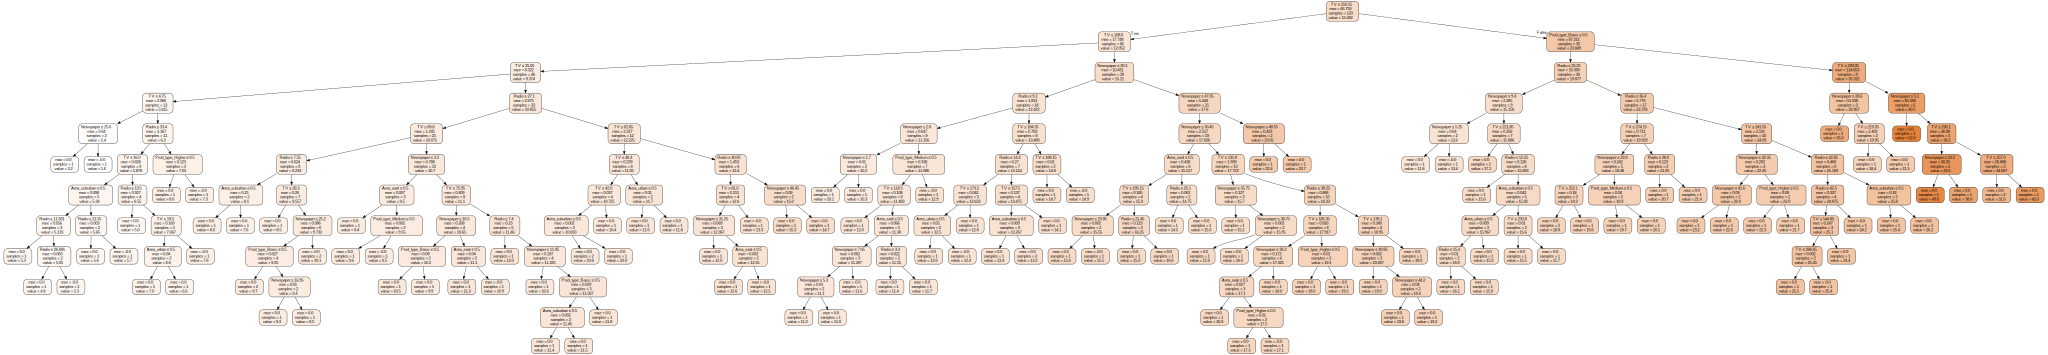

In [42]:
import graphviz
Sales_data = tree.export_graphviz(rtree, out_file=None, 
                                 feature_names=x.columns, 
                                 class_names = ['1', '0'],
                                 filled=True,
                                 rounded=True, 
                                 special_characters=True
                                 )
graph = graphviz.Source(Sales_data)
graph